# Análisis y automatización de informes

En este apartado vamos importar archivos desde Excel, realizar un análisis mediante la librería pandas, y automatizar la realización de informes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
plt.close("all")

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

Una vez hemos importado todas las librería que necesitamos, lo primero que vamos a hacer es importar un fichero de Excel. En este caso, el fichero lo he descargado de la página de Wikipedia a través del asistente disponible en Excel que nos permite importar tablas desde páginas web.

Pandas contiene una serie de funciones que nos permiten importar ficheros de distintas clases, si ponemos pd.read y a continuación damos a tabulador podemos comprobar que nos permite leer ficheros csv, excel, json, etc. Nos tenemos que asegurar que nuestro archivo python y el archivo que queremos importar se encuentran guardados en el mismo sitio, y a partir de aquí solo debemos indicar el nombre del mismo más la terminación.

Igualmente podemos indicar si tiene encabezados, si queremos que esté indexado por alguna de sus columnas o cualquier otro parametro.


In [5]:
IBEX = pd.read_excel("IBEX.xlsx")

Una vez importado podemos ver nuestro archivo:

In [6]:
IBEX

,Ticker,Empresa,Sede,Entrada,Sector,ISIN,Ponderación
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37
1,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52
2,ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53
3,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61
4,ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40
5,AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74
6,MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75
7,SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45
8,SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75
9,BKT.MC,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,0.93


Mediante info(), podemos saber el nombre de nuestras columnas, y qué tipo de datos forma nuestro archivo. En este caso son 7 columnas, con un total de 35 filas (de la 0 a la 34), siendo entrada y ponderación de tipo númerico, mientras el resto son nombres. 

In [7]:
IBEX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ticker       35 non-null     object 
 1   Empresa      35 non-null     object 
 2   Sede         35 non-null     object 
 3   Entrada      35 non-null     int64  
 4   Sector       35 non-null     object 
 5   ISIN         35 non-null     object 
 6   Ponderación  35 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.0+ KB


Continuamos ahora buscando más información de las empresas que componen el Ibex. Ahora vamos a extraer información de sus cotizaciones y vamos a complementar la información que disponemos. 

En primer lugar, generamos una lista con la columna Ticker, que son los simbolos que utiliza Yahoo Finance para realizar publicaciones. 

In [8]:
simbolos = IBEX['Ticker'].tolist() + ['^IBEX']
cotizaciones = yf.download(simbolos, period='3mo', auto_adjust=True)


[*********************100%***********************]  36 of 36 completed


A continuación podemos ver que hemos extraído la información de cotización de las empresas en los últimos 3 meses. Vamos a calcular la Beta de las empresas, y añadir la columna en el DataFrame Ibex

In [9]:
cotizaciones

Close                                                    \
               ACS.MC  ACX.MC     AENA.MC ALM.MC     AMS.MC      ANA.MC   
Date                                                                      
2021-01-25  26.469999   9.202  128.699997  11.49  52.259998  129.000000   
2021-01-26  26.250000   9.356  128.500000  11.53  53.439999  132.600006   
2021-01-27  25.469999   9.106  126.900002  11.59  53.560001  123.000000   
2021-01-28  26.260000   9.354  131.600006  11.44  54.360001  126.599998   
2021-01-29  25.719999   9.180  127.300003  11.28  52.540001  123.699997   
...               ...     ...         ...    ...        ...         ...   
2021-04-19  28.400000  11.650  141.050003  12.71  59.099998  140.199997   
2021-04-20  27.219999  11.505  134.699997  12.69  56.139999  139.800003   
2021-04-21  27.080000  11.570  135.399994  12.88  57.599998  138.699997   
2021-04-22  27.209999  11.695  136.699997  13.01  58.880001  143.000000   
2021-04-23  27.080000  11.705  135.600006  13.08  58.580002  143.600006   

                                                 ...  Volume           \
           BBVA.MC    BKT.MC CABK.MC     CIE.MC  ...  PHM.MC   REE.MC   
Date                                             ...                    
2021-01-25  3.8870  4.663374  1.9905  20.740000  ...  118569  1150619   
2021-01-26  3.9440  4.778324  2.0120  21.400000  ...  840370  1726413   
2021-01-27  3.8350  4.552389  1.9475  21.000000  ...  639250  2047521   
2021-01-28  3.9410  4.703012  2.0230  21.500000  ...  204542  1510126   
2021-01-29  3.7670  4.603918  2.0870  21.719999  ...  151609  1960719   
...            ...       ...     ...        ...  ...     ...      ...   
2021-04-19  4.5135  5.892000  2.5940  23.440001  ...   88487  1926112   
2021-04-20  4.3125  5.640000  2.4990  23.540001  ...   80747  1650195   
2021-04-21  4.2855  5.600000  2.5190  23.799999  ...   94399   812912   
2021-04-22  4.4005  5.524000  2.5350  24.600000  ...  100989  1134782   
2021-04-23  4.3955  5.568000  2.5100  24.100000  ...   52216    41783   

                                                                              \
              REP.MC    SAB.MC    SAN.MC  SGRE.MC   SLR.MC    TEF.MC  VIS.MC   
Date                                                                           
2021-01-25   8274994  42911454  50395819  1216059   729093   9356340   62017   
2021-01-26   6075048  33514549  39204006   910353  1608656   7631577   51337   
2021-01-27  11641234  45902842  55168498  1735892  3004067  13782732  105124   
2021-01-28   5489463  35972289  48708942  1515830  3010725  14697317  149635   
2021-01-29   5705565  45135530  67089538  1178526  1115784  16800207   98572   
...              ...       ...       ...      ...      ...       ...     ...   
2021-04-19   4130809  35412137  75691120   989139  2525252  12872013  123346   
2021-04-20  10296071  33291719  79870076  1353041  1919354  16845390   66345   
2021-04-21   6710269  36341886  70693560  1057005  1487499  10175787   61951   
2021-04-22   4360673  27145798  24676034  1198873  1626883  11811015   76889   
2021-04-23    163082   2469530   2421499   138347   259732  31453470   62961   

                       
                ^IBEX  
Date                   
2021-01-25  218852300  
2021-01-26  177642900  
2021-01-27  208275300  
2021-01-28  201655300  
2021-01-29  250623200  
...               ...  
2021-04-19  171375300  
2021-04-20  214621600  
2021-04-21  175189200  
2021-04-22  136381300  
2021-04-23   14834391  

[63 rows x 180 columns]

In [10]:
renta = np.log(1 + cotizaciones.loc[:,'Close'].pct_change()).dropna(how = 'all') #calculamos la rentabilidad
var = renta['^IBEX'].var() #calculamos la varianza del mercado
beta = renta.cov()/var #calculamos la beta con la covarianza de los valores
beta = beta['^IBEX'].head(35).to_frame('Beta') #selecionamos la columna de Ibex, que nos da las Betas de todos los valores, y renombramos la columna
beta = beta.reset_index() #quitamos el índice para convertirlo en columna
beta = beta.rename(columns={'index':'Ticker'}) #renombramos la columna para que coincida con DF Ibex

In [11]:
beta

,Ticker,Beta
0,ACS.MC,1.174603
1,ACX.MC,1.114867
2,AENA.MC,1.230557
3,ALM.MC,0.119786
4,AMS.MC,1.769956
5,ANA.MC,0.506261
6,BBVA.MC,1.880466
7,BKT.MC,1.324827
8,CABK.MC,1.045991
9,CIE.MC,0.242770


In [12]:
beta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  35 non-null     object 
 1   Beta    35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


Vemos que nuestro DF beta contiene 35 filas, con dos columnas, una de ellas es ticker, que coincide con el DF Ibex, que usaremos para unir ambos dataframe.

In [13]:
unir  = pd.merge(IBEX, beta, on='Ticker', how='outer')
unir

,Ticker,Empresa,Sede,Entrada,Sector,ISIN,Ponderación,Beta
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37,0.506261
1,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52,1.114867
2,ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53,1.174603
3,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61,1.230557
4,ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40,0.119786
5,AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74,1.769956
6,MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75,1.441711
7,SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45,1.666623
8,SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75,1.462177
9,BKT.MC,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,0.93,1.324827


Vamos a añadir ahora el precio del día. Para ello vamos a extraer el dato de la cotización del día, y después lo vamos a añadir a nuestro dataframe.

In [14]:
simbolos = unir['Ticker'].tolist()
cotizaciones = yf.download(simbolos, period='1d', auto_adjust=True)

[*********************100%***********************]  35 of 35 completed


In [15]:
cotiza = cotizaciones.loc[:,'Close'].T #Selecionamos el precio de cierre del día, y trasponemos la columna
cotiza = cotiza.reset_index() #quitamos el index, para dejar los ticker como una columna más
cotiza.columns=['Ticker','Precio del día'] #renombramos las columnas
cotiza

,Ticker,Precio del día
0,ACS.MC,27.080000
1,ACX.MC,11.705000
2,AENA.MC,135.649994
3,ALM.MC,13.080000
4,AMS.MC,58.580002
5,ANA.MC,143.600006
6,BBVA.MC,4.399000
7,BKT.MC,5.568000
8,CABK.MC,2.507000
9,CIE.MC,24.100000


In [16]:
cotiza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ticker          35 non-null     object 
 1   Precio del día  35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


Ahora volemos a unir nuestros dataframe, y podemos comprobar que tenemos incorporado el precio del día.

In [17]:
unido = pd.merge(unir, cotiza, on='Ticker', how="outer")

In [18]:
unido

,Ticker,Empresa,Sede,Entrada,Sector,ISIN,Ponderación,Beta,Precio del día
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37,0.506261,143.600006
1,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52,1.114867,11.705000
2,ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53,1.174603,27.080000
3,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61,1.230557,135.649994
4,ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40,0.119786,13.080000
5,AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74,1.769956,58.580002
6,MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75,1.441711,24.575001
7,SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45,1.666623,0.455200
8,SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75,1.462177,2.845000
9,BKT.MC,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,0.93,1.324827,5.568000


Podemos convertir nuestro dataframe en una tabla dinámica mediante pivot_table, y comprobamos que utiliza los campos númericos para realizar esta tabla

In [19]:
unido.pivot_table(index = "Ticker")

,Beta,Entrada,Ponderación,Precio del día
Ticker,,,,
ACS.MC,1.174603,1998,1.53,27.080000
ACX.MC,1.114867,2015,0.52,11.705000
AENA.MC,1.230557,2015,3.61,135.649994
ALM.MC,0.119786,2020,0.40,13.080000
AMS.MC,1.769956,2011,4.74,58.580002
ANA.MC,0.506261,2015,1.37,143.600006
BBVA.MC,1.880466,1992,5.12,4.399000
BKT.MC,1.324827,1992,0.93,5.568000
CABK.MC,1.045991,2009,3.70,2.507000


Podemos crear una tabla dinamica asignando distinta información. Index nos marcará la columna de la izquierda, siendo el índice de la tabla dinamica. Columns serán las columnas asignadas, y values serán los valores que queremos ver. Finalmente, para rellenar los huecos vacíos utilizamos fillna(0). 

Esta tabla no nos aporta mucha información, tan solo es n ejemplo de lo que podemos hacer con los datos.

In [20]:
unido.pivot_table(index = "Sede", columns='Entrada', values='Beta').fillna(0)

Entrada,1969,1992,1998,1999,2000,2001,2003,2004,2007,2008,2009,2011,2015,2016,2017,2018,2020
Sede,,,,,,,,,,,,,,,,,
Alcobendas,0.000000,0.000000,0.000000,0.893442,0.264043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.506261,0.000000,0.000000,0.000000,0.000000
Alicante,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arteijo,0.000000,0.000000,0.000000,0.000000,0.000000,1.092472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Barcelona,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119786
Bilbao,0.000000,1.158249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.242770,0.000000
Colmenar Viejo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.655647
Luxemburgo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.441711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Madrid,0.000000,0.794901,1.174603,1.428490,0.000000,0.000000,0.393329,0.000000,0.560274,0.000000,0.000000,1.872501,1.054268,0.051711,0.000000,0.547519,2.225129
Majadahonda,0.000000,0.781013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Medante describe obtenemos los datos estadísticos principales siemple de los datos númericos. 

In [21]:
unido.describe()

,Entrada,Ponderación,Beta,Precio del día
count,35.000000,35.000000,35.000000,35.000000
mean,2005.285714,2.854857,0.922846,27.060863
std,11.942439,3.356235,0.587942,34.335736
min,1969.000000,0.230000,-0.027250,0.455200
25%,1995.000000,0.615000,0.471147,7.171500
50%,2008.000000,1.530000,0.848138,18.240000
75%,2015.500000,3.805000,1.376658,27.165000
max,2020.000000,15.250000,2.225129,143.600006


Además podemos usar groupby para agrupar, y luego realizar calculor. En la siguiente línea agrupamos por segmentos y después sumamos las ponderaciones, con ello obtenemos información acerca de los sectores más influyentes en el Ibex35.

In [22]:
sector = unido.groupby('Sector').Ponderación.sum().nlargest(5)
sector

Sector
Electricidad y gas                   22.19
Bancos y cajas de ahorro             18.95
Textil, vestido y calzado            15.25
Telecomunicaciones y otros            7.83
Mineral, metales y transformación     5.75
Name: Ponderación, dtype: float64

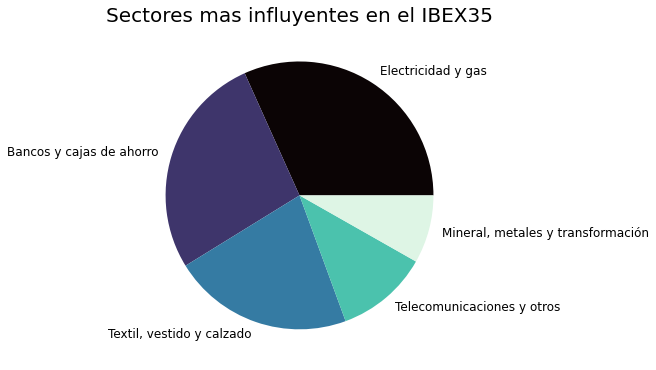

In [23]:
plt.figure(figsize=(6,10))
sector.plot(kind='pie',  subplots=True, fontsize=12, ylabel='', colormap ='mako') #colormap nos permite elegir el color del gráfico
plt.title("Sectores mas influyentes en el IBEX35", fontsize=20)

plt.savefig("Ibex.jpg", bbox_inches='tight') #nos guarda la imagen

plt.show()

Estos son todos los colores que podemos elegir en el gráfico:

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


Podemos hacer también una tabla donde visualizar las ponderaciones del Ibex

In [24]:
Pondera = unido.pivot_table(index = "Sector", values='Ponderación', aggfunc='sum')
Pondera = Pondera.sort_values(by='Ponderación', ascending=False)
Pondera = Pondera.reset_index()
Pondera

,Sector,Ponderación
0,Electricidad y gas,22.19
1,Bancos y cajas de ahorro,18.95
2,"Textil, vestido y calzado",15.25
3,Telecomunicaciones y otros,7.83
4,"Mineral, metales y transformación",5.75
5,Construcción,5.74
6,Transporte y distribución,5.63
7,Electrónica y software,4.97
8,Fabricación y montaje de bienes de equipo,3.91
9,Petróleo,2.99


A su vez, de nuestra tabla, podemos hacer listas que posteriormente utilizaremos en nuestro word para crear una tabla que irá insertada en nuestro documento.

In [25]:
sectores = Pondera['Sector'].tolist()
ponderaciones = Pondera['Ponderación'].tolist()

Podemos hacer un gráfico de barras horizontales con el número de empresas según los sectores que forman el Ibex35.

Realizamos estos gráficos, no tanto por la aportación de información, sino para mostrar las distintas posibilidades que existen a la hora de crear gráficos, y poder compaginar la información.

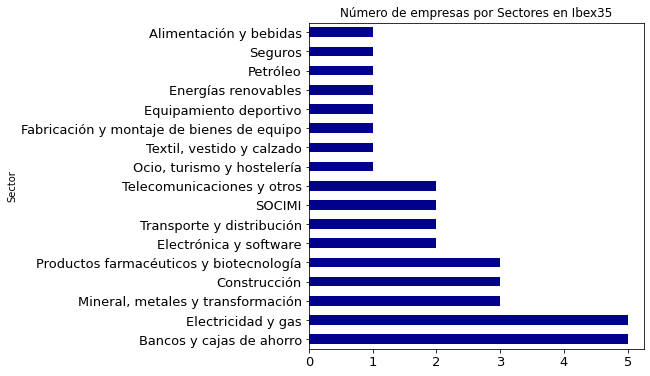

In [26]:
listaEmpresas = unido.groupby('Sector').Empresa.count().sort_values(ascending=False)
listaEmpresas.plot(kind='barh', figsize=(6,6), fontsize=13, color="darkblue")
plt.title("Número de empresas por Sectores en Ibex35")

plt.savefig("NumeroEmpresas.jpg", bbox_inches='tight')

plt.show()

Ahora vamos a hacer un gráfico en el que se muestran las 5 ciudades en las que más empresas del Ibex tienen su sede. Madrid, seguida de Alcobendas y Bilbao contienen el mayor número de empresas.

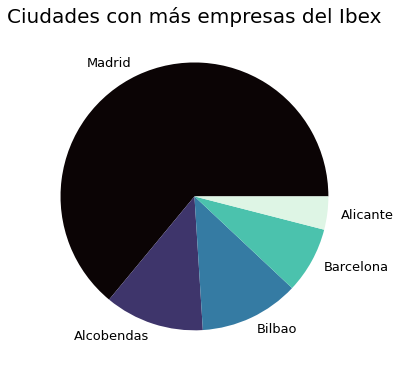

In [27]:
lugar = unido.groupby('Sede').Empresa.count().nlargest(5)
lugar.plot(kind='pie',  subplots=True, figsize=(6,10), fontsize=13, ylabel='', colormap='mako')
plt.title('Ciudades con más empresas del Ibex', fontsize=20)

plt.savefig("Ciudades.jpg", bbox_inches='tight') #es importante guardar la imagen antes de visualizarla, de lo contrario te guarda una imagen en blanco

plt.show()


Por último comprobamos el número de empresas que han entrado a formar parte del Ibex por año

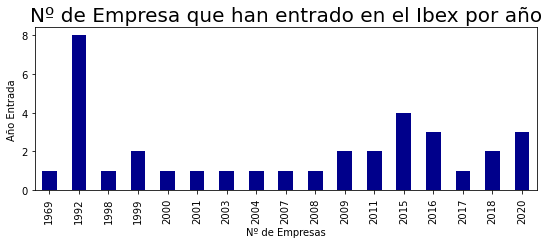

In [28]:
entrada = unido.groupby('Entrada').Empresa.count()
entrada.plot(kind='bar',  subplots=True, figsize=(9,3), fontsize=10, ylabel='', color='darkblue')
plt.title("Nº de Empresa que han entrado en el Ibex por año", fontsize=20)
plt.ylabel('Año Entrada')
plt.xlabel('Nº de Empresas')

plt.savefig("Empresa.jpg", bbox_inches='tight')


plt.show()




In [78]:
simb = simbolos + ['^IBEX']
evolu = yf.download(simb, period='3mo', auto_adjust=True)

[*********************100%***********************]  36 of 36 completed


In [103]:
evolu

Close                                                    \
               ACS.MC  ACX.MC     AENA.MC ALM.MC     AMS.MC      ANA.MC   
Date                                                                      
2021-01-25  26.469999   9.202  128.699997  11.49  52.259998  129.000000   
2021-01-26  26.250000   9.356  128.500000  11.53  53.439999  132.600006   
2021-01-27  25.469999   9.106  126.900002  11.59  53.560001  123.000000   
2021-01-28  26.260000   9.354  131.600006  11.44  54.360001  126.599998   
2021-01-29  25.719999   9.180  127.300003  11.28  52.540001  123.699997   
...               ...     ...         ...    ...        ...         ...   
2021-04-19  28.400000  11.650  141.050003  12.71  59.099998  140.199997   
2021-04-20  27.219999  11.505  134.699997  12.69  56.139999  139.800003   
2021-04-21  27.080000  11.570  135.399994  12.88  57.599998  138.699997   
2021-04-22  27.209999  11.695  136.699997  13.01  58.880001  143.000000   
2021-04-23  27.030001  11.730  135.550003  13.02  58.259998  143.500000   

                                                 ...  Volume           \
           BBVA.MC    BKT.MC CABK.MC     CIE.MC  ...  PHM.MC   REE.MC   
Date                                             ...                    
2021-01-25  3.8870  4.663374  1.9905  20.740000  ...  118569  1150619   
2021-01-26  3.9440  4.778324  2.0120  21.400000  ...  840370  1726413   
2021-01-27  3.8350  4.552389  1.9475  21.000000  ...  639250  2047521   
2021-01-28  3.9410  4.703012  2.0230  21.500000  ...  204542  1510126   
2021-01-29  3.7670  4.603918  2.0870  21.719999  ...  151609  1960719   
...            ...       ...     ...        ...  ...     ...      ...   
2021-04-19  4.5135  5.892000  2.5940  23.440001  ...   88487  1926112   
2021-04-20  4.3125  5.640000  2.4990  23.540001  ...   80747  1650195   
2021-04-21  4.2855  5.600000  2.5190  23.799999  ...   94399   812912   
2021-04-22  4.4005  5.524000  2.5350  24.600000  ...  100989  1134782   
2021-04-23  4.4050  5.596000  2.5170  24.139999  ...   68202    51372   

                                                                              \
              REP.MC    SAB.MC    SAN.MC  SGRE.MC   SLR.MC    TEF.MC  VIS.MC   
Date                                                                           
2021-01-25   8274994  42911454  50395819  1216059   729093   9356340   62017   
2021-01-26   6075048  33514549  39204006   910353  1608656   7631577   51337   
2021-01-27  11641234  45902842  55168498  1735892  3004067  13782732  105124   
2021-01-28   5489463  35972289  48708942  1515830  3010725  14697317  149635   
2021-01-29   5705565  45135530  67089538  1178526  1115784  16800207   98572   
...              ...       ...       ...      ...      ...       ...     ...   
2021-04-19   4130809  35412137  75691120   989139  2525252  12872013  123346   
2021-04-20  10296071  33291719  79870076  1353041  1919354  16845390   66345   
2021-04-21   6710269  36341886  70693560  1057005  1487499  10175787   61951   
2021-04-22   4360673  27145798  24676034  1198873  1626883  11811015   76889   
2021-04-23    263204   2976265   3184064   216123   335011  32062207   73044   

                       
                ^IBEX  
Date                   
2021-01-25  218852300  
2021-01-26  177642900  
2021-01-27  208275300  
2021-01-28  201655300  
2021-01-29  250623200  
...               ...  
2021-04-19  171375300  
2021-04-20  214621600  
2021-04-21  175189200  
2021-04-22  136381300  
2021-04-23   19681965  

[63 rows x 180 columns]

In [106]:
evoluci = evolu.loc[:,'Close']
evoluci

,ACS.MC,ACX.MC,AENA.MC,ALM.MC,AMS.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,CIE.MC,...,PHM.MC,REE.MC,REP.MC,SAB.MC,SAN.MC,SGRE.MC,SLR.MC,TEF.MC,VIS.MC,^IBEX
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-25,26.469999,9.202,128.699997,11.49,52.259998,129.000000,3.8870,4.663374,1.9905,20.740000,...,87.750000,16.000000,8.300,0.3560,2.4900,36.639999,25.200001,3.5870,58.450001,7897.299805
2021-01-26,26.250000,9.356,128.500000,11.53,53.439999,132.600006,3.9440,4.778324,2.0120,21.400000,...,106.300003,15.965000,8.452,0.3685,2.5325,35.470001,23.299999,3.6560,58.500000,7964.899902
2021-01-27,25.469999,9.106,126.900002,11.59,53.560001,123.000000,3.8350,4.552389,1.9475,21.000000,...,107.599998,16.190001,8.522,0.3618,2.4325,33.400002,20.780001,3.7090,58.950001,7852.700195
2021-01-28,26.260000,9.354,131.600006,11.44,54.360001,126.599998,3.9410,4.703012,2.0230,21.500000,...,103.599998,16.110001,8.372,0.3730,2.4815,33.720001,21.500000,3.6130,58.799999,7932.500000
2021-01-29,25.719999,9.180,127.300003,11.28,52.540001,123.699997,3.7670,4.603918,2.0870,21.719999,...,105.000000,15.660000,8.122,0.3618,2.4150,33.889999,21.240000,3.5540,58.200001,7757.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-19,28.400000,11.650,141.050003,12.71,59.099998,140.199997,4.5135,5.892000,2.5940,23.440001,...,92.879997,15.305000,10.252,0.4767,2.9650,29.830000,17.730000,3.7630,60.349998,8711.400391
2021-04-20,27.219999,11.505,134.699997,12.69,56.139999,139.800003,4.3125,5.640000,2.4990,23.540001,...,91.139999,15.115000,9.850,0.4570,2.8515,29.340000,16.645000,3.6850,59.599998,8459.400391
2021-04-21,27.080000,11.570,135.399994,12.88,57.599998,138.699997,4.2855,5.600000,2.5190,23.799999,...,95.260002,15.040000,10.080,0.4578,2.8170,30.180000,16.764999,3.7030,59.650002,8519.799805


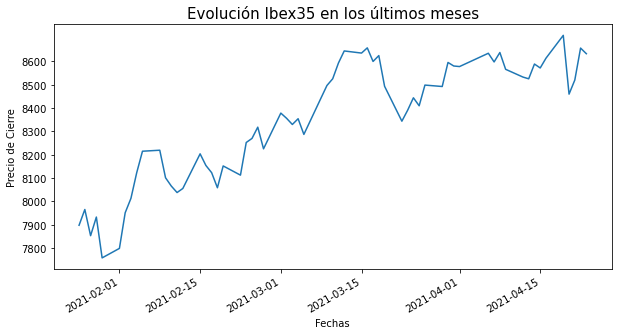

In [274]:
evoluci['^IBEX'].plot(figsize=(10,5));
plt.title('Evolución Ibex35 en los últimos meses', fontsize=15)
plt.ylabel('Precio de Cierre')
plt.xlabel('Fechas')
plt.yticks(range(7800,8700,100));

plt.savefig("Evolucion.jpg", bbox_inches='tight')

plt.show()

In [182]:
evo_media = pd.DataFrame(evoluci.mean())
evo_media.columns = ['Media 3 meses']
medias = evo_media['Media 3 meses'].tolist()
evo_media

,Media 3 meses
ACS.MC,26.663809
ACX.MC,10.307889
AENA.MC,137.315080
ALM.MC,11.869206
AMS.MC,58.017143
ANA.MC,133.668253
BBVA.MC,4.436889
BKT.MC,5.435568
CABK.MC,2.422111
CIE.MC,22.631111


In [265]:
evo_destip = evoluci.std().sort_values(ascending=False)
mayores = evo_destip.nlargest(5)
mayores = pd.DataFrame(mayores)
mayores.columns = ['Desviación Típica']
mayores

,Desviación Típica
^IBEX,256.107975
PHM.MC,8.140967
ANA.MC,6.527284
AENA.MC,5.083525
AMS.MC,2.921800


In [268]:
mayor = mayores['Desviación Típica'].tolist()  #para luego insertar una tabla en word
empr = ['Ibex', 'PHM', 'ANA', 'AENA', 'AMS']

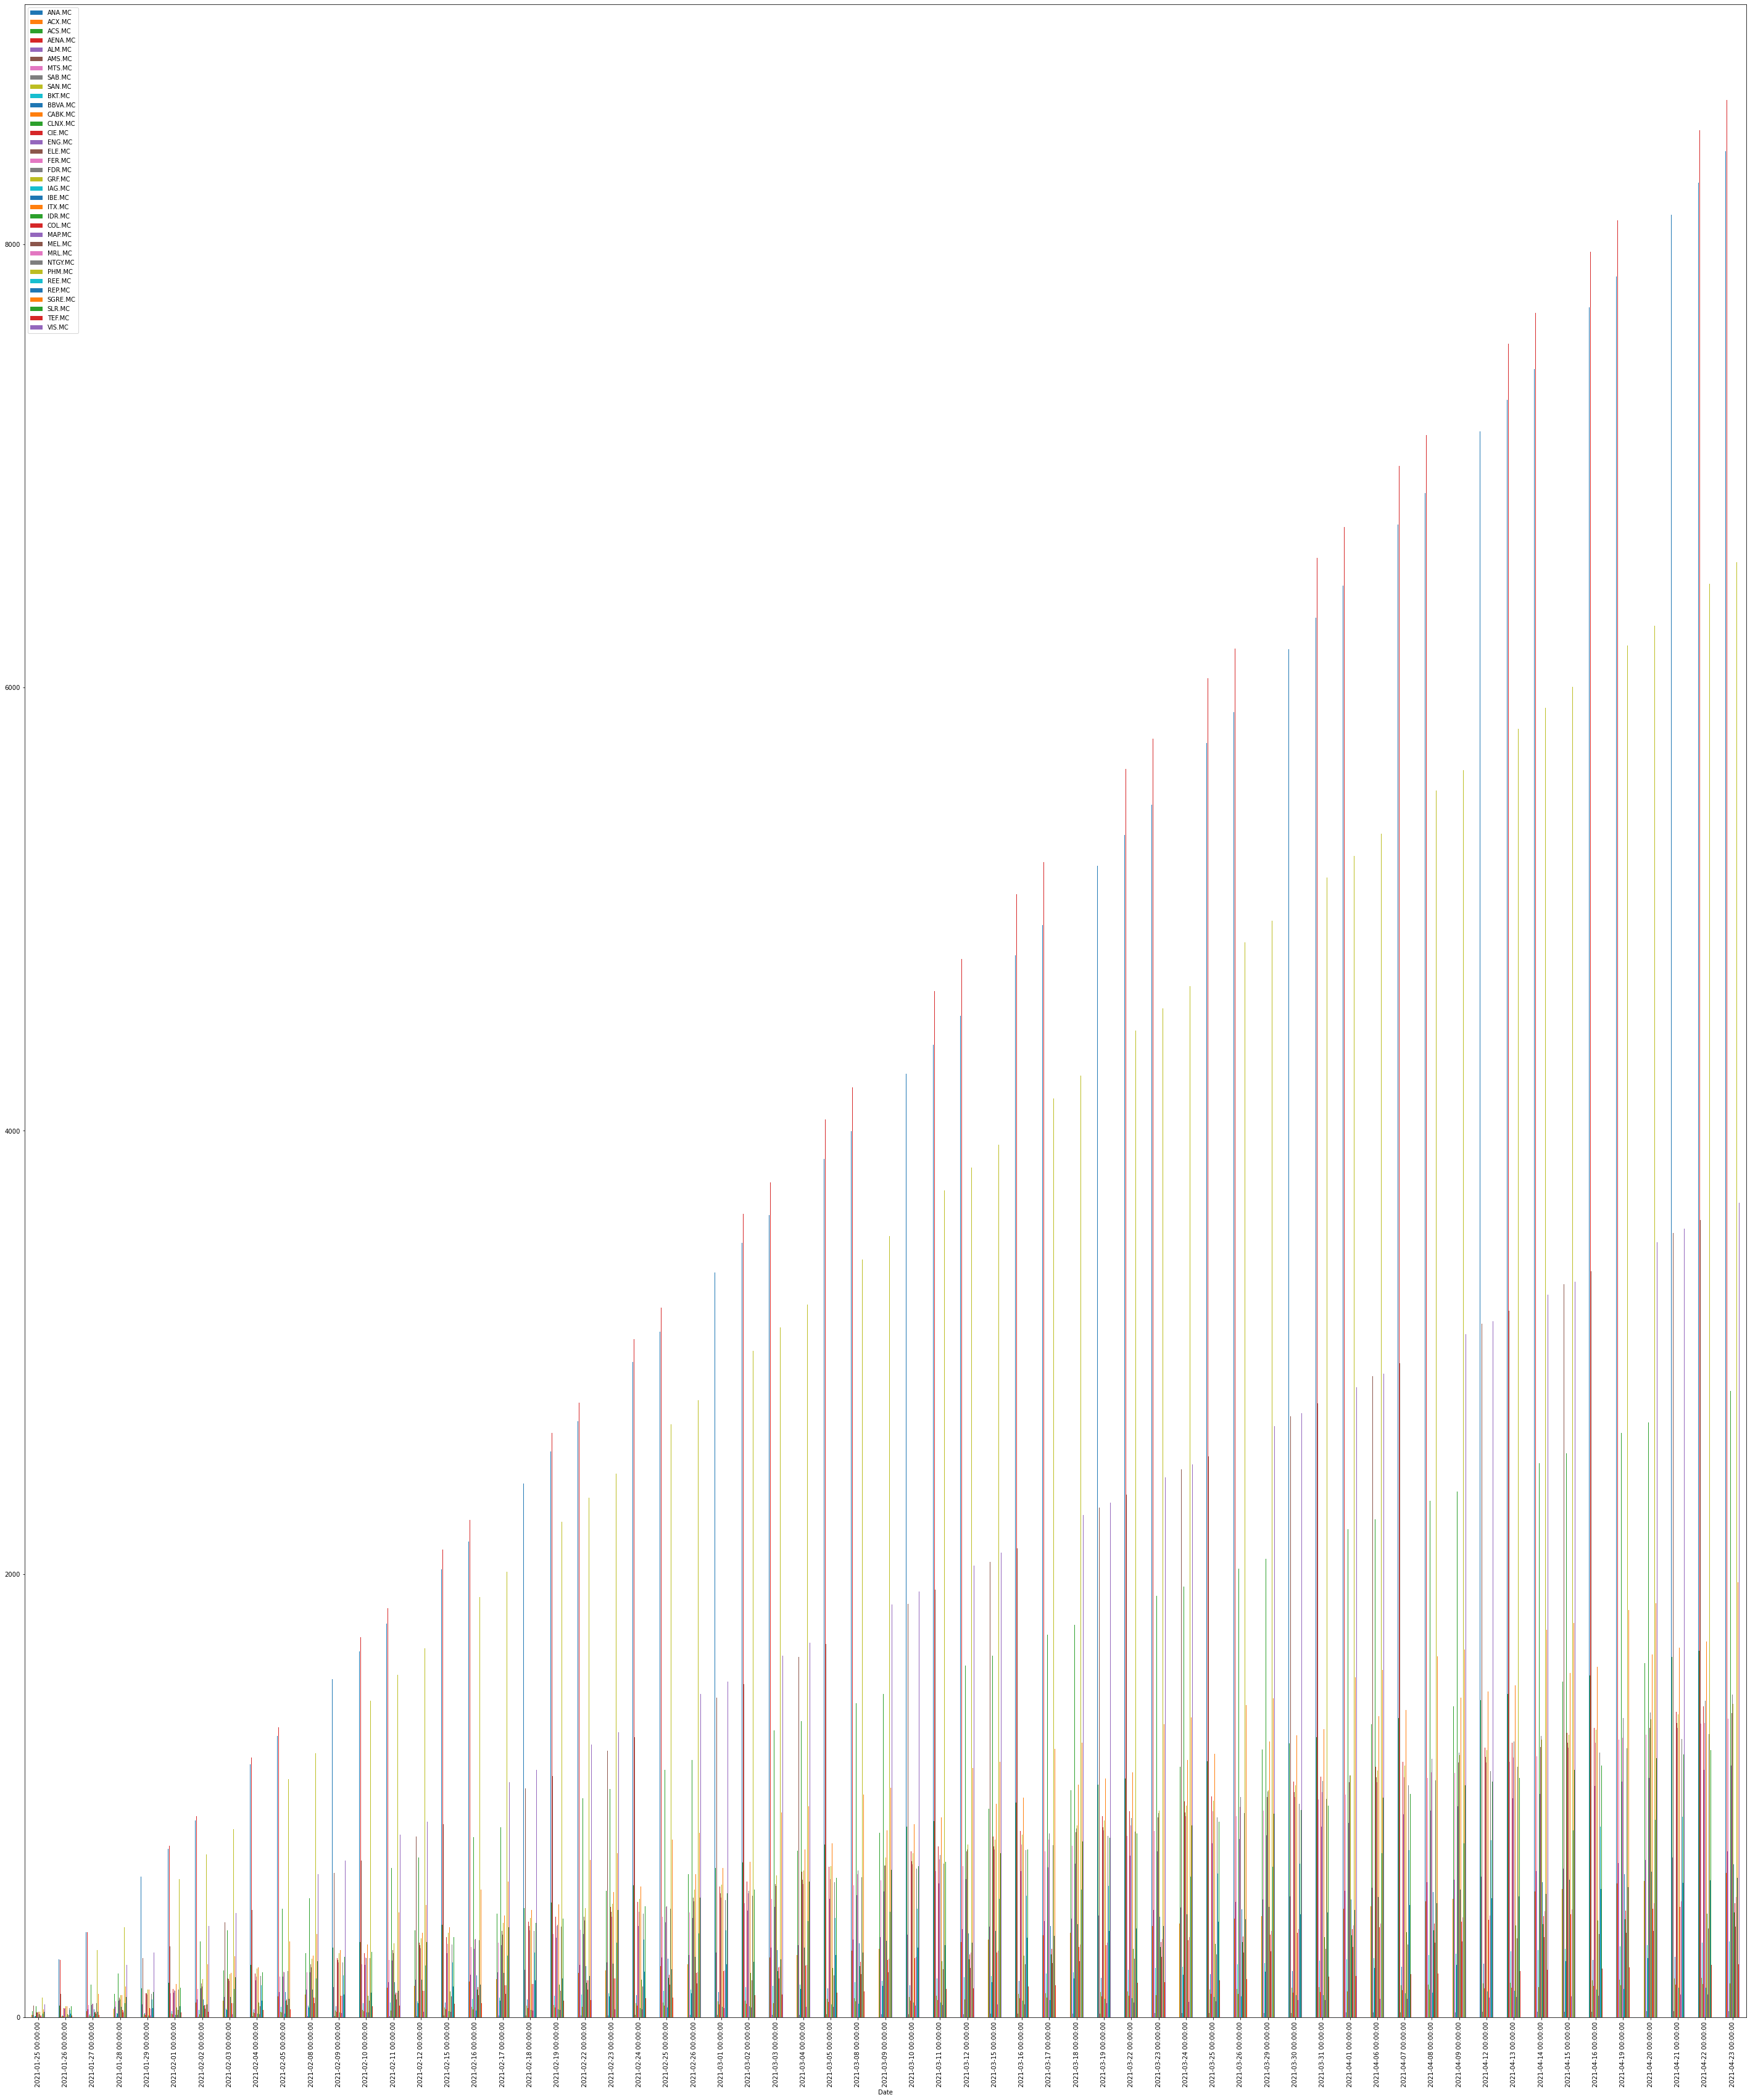

In [281]:
evoluci[simbolos].cumsum().plot(subplots=False,figsize=(50,60));


In [30]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


Vamos a crear ahora un informe en Word automatizado para que guarde nuestras imagenes

In [151]:
from docx import Document
from docx import shared
from docx.shared import Cm
from docx.shared import Pt

In [32]:
print(dir(shared))

['Cm', 'ElementProxy', 'Emu', 'Inches', 'Length', 'Mm', 'Parented', 'Pt', 'RGBColor', 'Twips', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'absolute_import', 'lazyproperty', 'print_function', 'unicode_literals', 'write_only_property']


In [273]:
document = Document()
document.add_heading("ANÁLISIS DE IBEX_35", level=0)
document.add_heading("1. Características del Ibex35", level=1)
document.add_paragraph("El Ibex se compone de las 35 empresas con más liquidez que cotizan en el sistema bursátil español que está formado por las bolsas de Madrid, Valencia, Barcelona y Bilbao. Por ello se utiliza como referencia para conocer la situación de la Bolsa española.")
document.add_paragraph("Si comprobamos la distribución por sectores, podemos comprobar que Electricidad y Gas es el sector más representativo, ya que supone un 22% del Ibex, seguido de la Banca, Textil y calzado, Telecomunicaciones y Minerales-transformación.")

document.add_picture("Ibex.jpg", width=Cm(11))

document.add_paragraph("El gráfico nos muestra los 5 sectores más representativos, siendo un total de 17 sectores los que están representados en el Ibex.35")
document.add_paragraph("En la siguiente tabla comprobamos la distribución por sectores del Ibex")

table = document.add_table(rows=1, cols=2, style='Colorful Shading Accent 1')
#font = row_cells[0].text
table.height = Pt(8)

table.rows[0].cells[0].text = 'Sectores'
table.rows[0].cells[1].text = 'Ponderación'

for i,p  in zip(sectores, ponderaciones):
    row_cells = table.add_row().cells
    row_cells[0].text = i
    row_cells[1].text = str(round(p,2)) + '%'
    
document.add_paragraph("")
document.add_paragraph("En el siguiente gráfico podemos comprobar el número de empresas totales por sector")    
document.add_picture("NumeroEmpresas.jpg", width=Cm(10), height=Cm(8))

document.add_paragraph('')
document.add_paragraph('En el siguiente gráfico vemos las 5 ciudades donde más empresas tienen sus sedes.')
document.add_picture("Ciudades.jpg", width=Cm(7))
document.add_paragraph("""Madrid es la ciudad donde más empresas tienen su sede, seguido de Alcobendas y Bilbao. Después le siguen Barcelona y Alicante. 
Posiblemente podemos encontrar distintos motivos por los que la empresas deciden establecer su sede en un punto geográfico y no otro, así las infraestructuras, la innovación tecnológica o su capital humano son factores que influyen a la hora de establecer la sede de una empresa.""")

document.add_paragraph('El Ibex se creó en 1.992, por ello no es de extrañar que nos encontremos con el año en el que más entradas se produjeron en el Ibex.')
document.add_paragraph('En el siguiente gráfico podemos ver el número de entradas por año.')
document.add_picture('Empresa.jpg', width=Cm(12))
document.add_paragraph('Podemos ver una entrada en el año 1969, que probablemente sea un error publicado en la fuente de origen de los datos, Wikipedia, puesto que la creación del Ibex fue en 1.992, y por tanto el año 1969 debe ser el año de creación de la propia empresa.')      

document.add_heading("2. Análisis evolución Ibex 35", level=1)
document.add_paragraph("En el siguiente gráfico podemos ver la evolución del Ibex 35 de los últimos 3 meses")
document.add_picture("Evolucion.jpg", width=Cm(12))
document.add_paragraph("La tendencia, después de meses marcados por pérdidas debido al coronavirus, es alcista. Parece que las previsiones económicas en 2021 establecen recuperaciones económicas tanto para Europa como para España, lo que inyecta confianza en los inversores.")
document.add_paragraph("Esto se ve reflejado en las subidas experimentadas en el Ibex a lo largo de estos meses.")

document.add_paragraph("En la siguiente tabla podemos comprobar el precio de medio de los últimos 3 meses")
table = document.add_table(rows=1, cols=2, style='Colorful Shading Accent 1')
table.height = Pt(8)

table.rows[0].cells[0].text = 'Empresas'
table.rows[0].cells[1].text = 'Precio medio 3 meses'

for s,m  in zip(simbolos, medias):
    row_cells = table.add_row().cells
    row_cells[0].text = s
    row_cells[1].text = str(round(m,2)) + '€'
    
document.add_paragraph("No todos los valores sufren las mismas variaciones. Para saber si los valores oscilan mucho en precios, podemos calcular la desviación típica que nos dará una idea de cómo han variado en precio durante los últimos 3 meses.")

document.add_paragraph('')
document.add_paragraph('') 
document.add_paragraph('')

document.add_paragraph("En la siguiente tabla, podemos ver la variación del Ibex en primer lugar, seguido de los 4 valores que más variaciones han sufrido en estos meses:")

table = document.add_table(rows=1, cols=2, style='Colorful Shading Accent 1')
table.height = Pt(8)

table.rows[0].cells[0].text = 'Empresas'
table.rows[0].cells[1].text = 'Variacion típica en 3 meses'

for s,m  in zip(empr, mayor):
    row_cells = table.add_row().cells
    row_cells[0].text = s
    row_cells[1].text = str(round(m,2))
    

document.add_paragraph("Para finalizar vamos a insertar un gráfico de la evolución de todas las empresas del Ibex en los últimos meses")

document.save('Ibex.docx')

Con esto hemos comprobado que podemos hacer un informe totalmente automatizacido.